# 1. Exploratory Analysis

On the first step of analysis needs to creat DataFrame from 'mnist.csv' file. Data set contains 42000 rows and 785 columns. "Label" column is a our target (the digit) and 784 columns of features (pixels).    

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from scipy import stats

%matplotlib inline

In [3]:
df = pd.read_csv("mnist.csv")
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


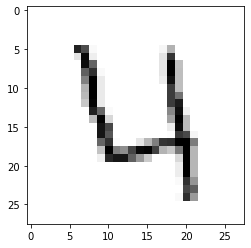

In [3]:
input_data = np.array(df.drop(["label"], axis=1))
digit_image = input_data[3].reshape(28, 28)
plt.imshow(digit_image, cmap = 'binary')
plt.show()

### 1.1 Predicting Majority class

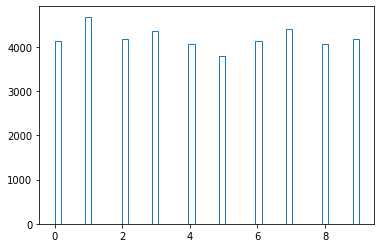

In [17]:
plt.hist(labels, bins=50, histtype='step')
plt.show()

In [42]:
labels = df["label"]
entries = np.array([])
for i in range(10):
    count_i = labels[labels == i]
    precentege = count_i.count()/labels.count() * 100 
    print("Label {}: {:0.2f}%".format(i, precentege))
    entries = np.append(entries, [i, precentege])

Label 0: 9.84%
Label 1: 11.15%
Label 2: 9.95%
Label 3: 10.36%
Label 4: 9.70%
Label 5: 9.04%
Label 6: 9.85%
Label 7: 10.48%
Label 8: 9.67%
Label 9: 9.97%


### 1.3 With futher analysis some additional notes:
    1. For all none zero features its usefull to make them equals (=1). We might have seen a lot more variety if        will be work woth binary distinguishable values
    2. To reduce tilt of digits (it makes symmetry feature more strong) 
    3. Put digit at frame centre
    4. Try to overlap digits to calculate mean difference

In [5]:
labels = df['label']
newDF = df.drop('label', axis=1)

newDF[newDF > 0] = 1

newDF = pd.concat([labels, newDF], axis=1)

In [29]:
newDF.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


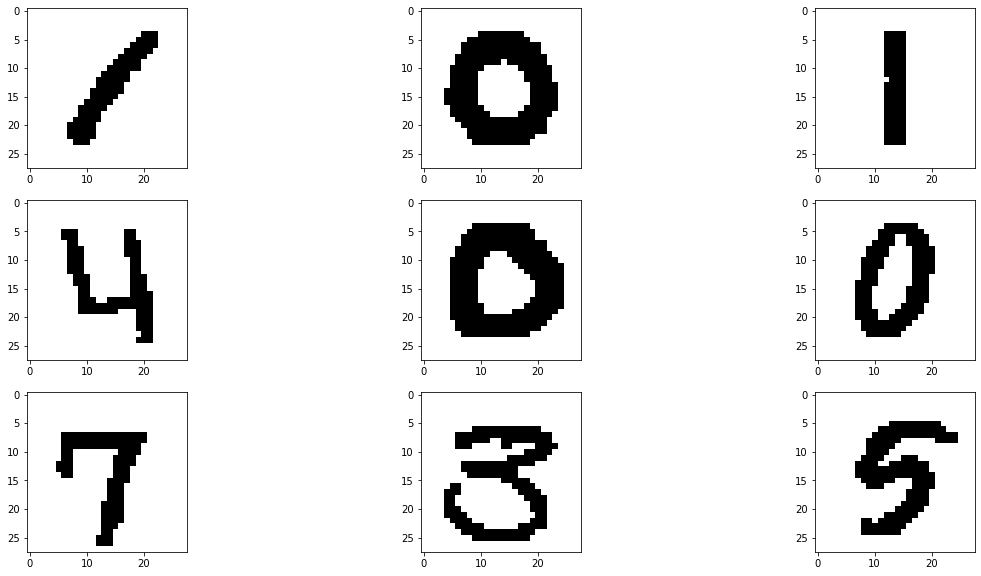

In [7]:
input_data = np.array(newDF.drop(["label"], axis=1))
digit_image = input_data[3].reshape(28, 28)
# plt.imshow(digit_image, cmap = 'binary')
# plt.show()

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 10))
axes = axes.flat

for i in range(9):
    digit_image = input_data[i].reshape(28, 28)
    axes[i].imshow(digit_image, cmap = 'binary')
    #axes[i].axis('off')

# 2. Calculating density

In [58]:
new_df = newDF 
new_df["density"] = new_df.iloc[:, 1:-1].astype(bool).sum(axis=1)

In [59]:
new_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,density
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,97
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,245
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,79
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,113
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,260


In [60]:
DF_Label_Density = new_df.iloc[:, [0,-2, -1]]

In [61]:
DF_Label_Density.head()

,label,pixel783,density
0,1,0,97
1,0,0,245
2,1,0,79
3,4,0,113
4,0,0,260


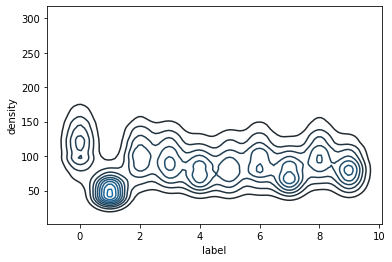

In [11]:
sns.kdeplot(DF_Label_Density["label"], DF_Label_Density["density"], )

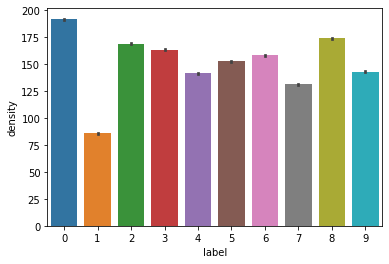

In [34]:
sns.barplot(x="label", y="density", data=DF_Label_Density, ci=68)

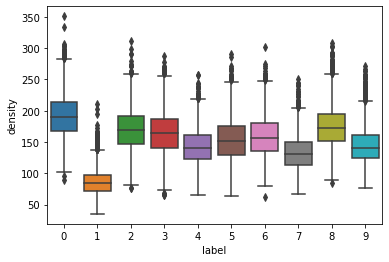

In [250]:
sns.boxplot(x="label", y="density", data=DF_Label_Density)

### 2.1 Deleting useless features!

In [290]:
clearDF = newDF
for i in clearDF.columns:
    if clearDF[i].sum() == 0:
        clearDF.drop(i, axis=1, inplace=True)

### 2.2 Mean diviation and standart diviation

In [51]:
for i in range(10):
    DF_Label_Density = new_df.iloc[:, [0,-2, -1]]
    digit_density = DF_Label_Density['density'][DF_Label_Density['label'] == i]
    text = "Label: {}, Mean diviation : {:0.2f}, Standartd diviation : {:0.2f}" 
    print(text.format(i, digit_density.mean(), digit_density.std()))

Label: 0, Mean diviation : 191.74, Standartd diviation : 33.70
Label: 1, Mean diviation : 85.73, Standartd diviation : 20.01
Label: 2, Mean diviation : 168.97, Standartd diviation : 33.06
Label: 3, Mean diviation : 163.52, Standartd diviation : 33.64
Label: 4, Mean diviation : 141.50, Standartd diviation : 27.92
Label: 5, Mean diviation : 152.76, Standartd diviation : 33.77
Label: 6, Mean diviation : 158.21, Standartd diviation : 32.66
Label: 7, Mean diviation : 131.42, Standartd diviation : 27.03
Label: 8, Mean diviation : 173.97, Standartd diviation : 32.84
Label: 9, Mean diviation : 143.25, Standartd diviation : 28.54


In [56]:
def density_analyse(data):
    mean_diff = []
    for i in range(0, 10):
        for j in range(0, 10):
            if j != i:
                mean_dense_i = DF_Label_Density['density'][DF_Label_Density['label'] == i].mean()
                mean_dense_j = DF_Label_Density['density'][DF_Label_Density['label'] == j].mean()
                mean_difference = abs(mean_dense_i - mean_dense_j)
                mean_diff.append([mean_difference, j, i])
    
    data_frame = pd.DataFrame(mean_diff, columns=["dens_diff", "label_x", "label_y"])
    sorted_df = data_frame.sort_values(by='dens_diff')
                
    return sorted_df.iloc[::2], np.array(sorted_df.iloc[1:2]).reshape(3), np.array(sorted_df.iloc[-2:-1]).reshape(3) 

In [57]:
mean_diff, min_diff, max_diff = density_analyse(DF_Label_Density)

print("Max mean density difference {:0.2f} between {} and {}".format(max_diff[0], int(max_diff[1]), int(max_diff[2])))
print("Min mean density difference {:0.2f} between {} and {}".format(min_diff[0], int(min_diff[1]), int(min_diff[2])))


Max mean density difference 106.01 between 0 and 1
Min mean density difference 1.75 between 4 and 9


In [16]:
mean_diff.head()

,dens_diff,label_x,label_y
44,1.751924,9,4
25,5.005499,8,2
32,5.309825,6,3
29,5.448039,2,3
50,5.454588,6,5


### 2.3 Logistic Regression with Density feature only

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import scale
from sklearn.utils.multiclass import unique_labels
import warnings
warnings.filterwarnings('ignore')

In [63]:
LR = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')

X = DF_Label_Density.loc[:,["density"]]
X = scale(X)
#X = normalize(X)
y = DF_Label_Density["label"]

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [65]:
LR.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [114]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [66]:
prediction = LR.predict(X_test)

In [67]:
accuracy_score(y_test, prediction)  #only density feature

0.25866666666666666

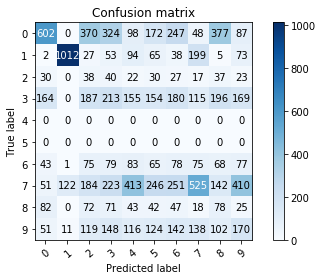

In [87]:
#confusion_matrix(y_test, prediction)
plot_confusion_matrix(y_test, prediction, classes=[0,1,2,3,4,5,6,7,8,9], title='Confusion matrix')
plt.show()

In [133]:
scores = cross_val_score(LR, X, y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.33 (+/- 0.01)


# 3. Calculating symmetry (new feature) 

In [88]:
#testDf = df.iloc[2]

symmetry = np.array([])
for index in range(newDF.shape[0]):
    sim_level = 0
    testDf = np.array(newDF.iloc[[index], 1:])
    total_density = testDf[0][:].astype(bool).sum() 
    i = 0
    j = 783
    while i < 392:
        if testDf[0][i] != 0 and testDf[0][j] != 0:
            sim_level += 2
        i += 1
        j -= 1
        #print("Row {}, simmetry: {}".format(index, sim_level/sum_ink))

    symmetry = np.append(symmetry, [sim_level/total_density])

In [89]:
newDF['symmetry'] = symmetry
newDF.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,density,symmetry
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,97,0.755102
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,245,0.902439
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,79,0.975000
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,113,0.578947
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,260,0.789272


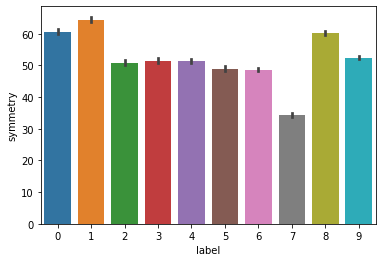

In [90]:
newDF['symmetry'] = newDF['symmetry']*100
sns.barplot(x="label", y="symmetry", data=newDF, ci=100)

### 3.1 Logistic Regression with Symmetry feature only

In [115]:
LR = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')

X = newDF.loc[:,["symmetry"]]
X = scale(X)
y = newDF["label"]

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [117]:
LR.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [118]:
prediction_sym = LR.predict(X_test)
accuracy_score(y_test, prediction_sym) #only simmerty feature

0.20123809523809524

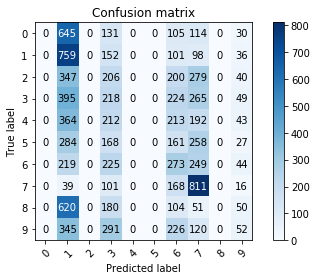

In [119]:
#confusion_matrix(y_test, prediction)
plot_confusion_matrix(y_test, prediction_sym, classes=[0,1,2,3,4,5,6,7,8,9], title='Confusion matrix')
plt.show()

# 4. Logistic Regression with Symmetry and Density features

In [120]:
LR = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')

X = newDF.loc[:,["density", "symmetry"]]
X = scale(X)
y = newDF["label"]

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [122]:
LR.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [123]:
prediction_sym_dens = LR.predict(X_test)
accuracy_score(y_test, prediction_sym_dens) #simmerty and density features

0.32704761904761903

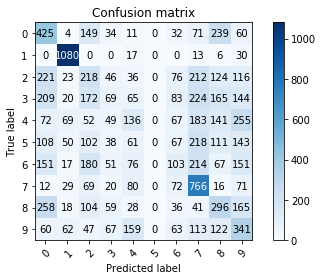

In [124]:
#confusion_matrix(y_test, prediction)
plot_confusion_matrix(y_test, prediction_sym_dens, classes=[0,1,2,3,4,5,6,7,8,9], title='Confusion matrix')
plt.show()

In [125]:
scores = cross_val_score(LR, X, y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.33 (+/- 0.01)


# Logistic Regression with all features

In [17]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, normalize
from tensorflow.keras.utils import to_categorical

In [142]:
LR = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')

X = newDF.iloc[:40000, 1:-2]
y = newDF.iloc[:40000, [0]]

In [141]:
newDF.iloc[:40000, 1:-2].head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [143]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
LR.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [144]:
prediction = LR.predict(X_test)
accuracy_score(y_test, prediction)

0.9052272727272728

In [99]:
LR = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')

X = newDF.iloc[:, 1:]
y = newDF.iloc[:, [0]]
X = normalize(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
LR.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [100]:
prediction = LR.predict(X_test)
accuracy_score(y_test, prediction)

0.9068542568542568

In [75]:
scores = cross_val_score(LR, X, y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.90 (+/- 0.00)
